In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("github/sensor_data/sensor_data_200.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))

In [5]:
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


[]

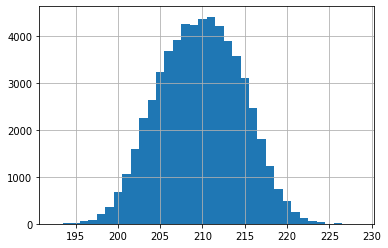

In [6]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), align="left")
plt.plot()

In [7]:
mean1 = sum(data["lidar"].values)/len(data["lidar"])
mean2 = data["lidar"].mean()
print(mean1, mean2)

209.73713297619855 209.73713297619855


[]

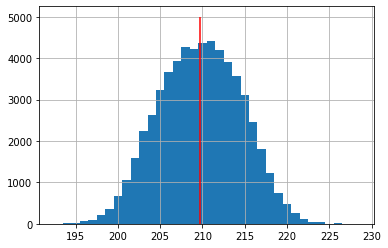

In [8]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), align="left")
plt.vlines(mean1, ymin=0, ymax=5000, color="red")
plt.plot()

In [9]:
print(sum((data["lidar"].values-mean1)**2)/len(data["lidar"]))
print(sum((data["lidar"].values-mean1)**2)/(len(data["lidar"])-1))
print(data["lidar"].var(ddof=False))
print(data["lidar"].var())

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504


In [10]:
type(data["lidar"].values)

numpy.ndarray

In [11]:
data["lidar"].std()**2

23.408106598554504

In [13]:
freqs=pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [14]:
type(data["lidar"].value_counts())

pandas.core.series.Series

In [15]:
freqs["probs"] = freqs["lidar"] / len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [16]:
sum(freqs["probs"])

1.0

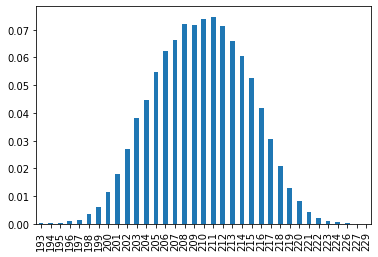

In [17]:
freqs["probs"].sort_index().plot.bar()
plt.show()

In [18]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]

drawing()

204

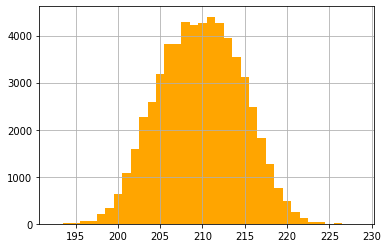

In [19]:
samples = [drawing() for i in range(len(data["lidar"]))]
simulated = pd.DataFrame(samples, columns=["lidar"])
p=simulated["lidar"]
p.hist(bins=max(p)-min(p), color="orange", align="left")

In [20]:
import numpy as np
def gd(z, u=209.7, sig2=23.4):
    return np.exp(-((z-u)**2)/2.0/sig2)/np.sqrt(2.0*np.pi*sig2)

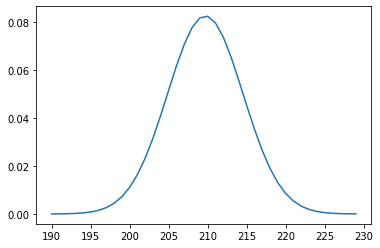

In [21]:
zr=range(190,230)
yr=[gd(z) for z in zr]

plt.plot(zr, yr)
plt.show()

In [22]:
def dgd(z, width=0.5):
    return width*(gd(z+width)+gd(z-width))

In [23]:
zr

range(190, 230)

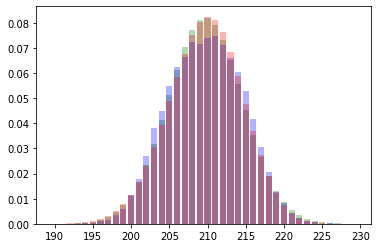

In [30]:
dyr=[dgd(z) for z in zr]
plt.bar(zr, dyr, color="green", alpha=0.3)
f=freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
#問題2-3
u=209.7
sig=23.4
p=1-(sig/u)
n=u/p
from scipy.special import comb
def double(x):
    return comb(n, x)*(p**x)*((1-p)**(n-x))
xr=[i for i in range(190,230)]
yr=[double(x) for x in range(190,230)]
plt.bar(xr, yr, color="red", alpha=0.3)
plt.show()

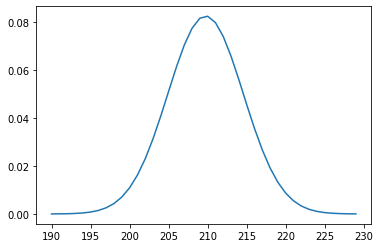

In [26]:
from scipy.stats import norm

zr=range(190,230)
yr=[norm.pdf(z, mean1, data["lidar"].std()) for z in zr]

plt.plot(zr, yr)
plt.show()

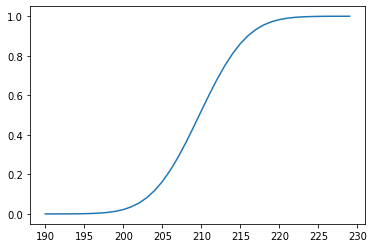

In [27]:
yr=[norm.cdf(z, mean1, data["lidar"].std()) for z in zr]

plt.plot(zr, yr)
plt.show()